In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.initializers import HeNormal

In [57]:
# Load the dataset
originial_data = pd.read_csv('../data/MOCK_DATA.csv')
originial_data.head()

,id,first_name,last_name,email,gender,ip_address,transaction_id,customer_id,product_id,quantity,...,shipping_status,discount_code,tax_rate,shipping_cost,refund_amount,return_reason,review_rating,review_comment,tracking_number,delivery_date
0,1,Vernor,Habble,vhabble0@bravesites.com,Male,126.152.7.191,1,1,1,100,...,Processing,WELCOME25,0.07,19.68,20.86,Changed Mind,2,Suspendisse potenti. Nullam porttitor lacus at...,3553570483,9/21/2021
1,2,Helaine,Lemmer,hlemmer1@e-recht24.de,Female,141.45.190.119,2,2,2,9,...,Processing,SUMMER20,0.16,4.01,947.59,Changed Mind,1,Donec quis orci eget orci vehicula condimentum...,7835153182,9/11/2021
2,3,Clayton,Sigert,csigert2@yolasite.com,Male,241.7.107.44,3,3,3,11,...,In Transit,SUMMER20,0.11,2.33,947.19,Wrong Size,5,In hac habitasse platea dictumst. Maecenas ut ...,3913099522,2/21/2021
3,4,Vanny,McElree,vmcelree3@amazon.com,Bigender,22.12.15.179,4,4,4,97,...,Delivered,SUMMER20,0.07,17.08,615.58,Wrong Size,5,Nunc rhoncus dui vel sem. Sed sagittis. Nam co...,2708402093,2/1/2021
4,5,Agretha,Paulus,apaulus4@ehow.com,Female,203.232.205.213,5,5,5,32,...,Processing,SAVE10,0.06,14.11,108.98,Changed Mind,5,"Donec vitae nisi. Nam ultrices, libero non mat...",9605566056,3/8/2021


In [58]:
data = originial_data
data.columns

Index(['id', 'first_name', 'last_name', 'email', 'gender', 'ip_address',
       'transaction_id', 'customer_id', 'product_id', 'quantity', 'unit_price',
       'total_price', 'purchase_date', 'shipping_address', 'payment_method',
       'order_status', 'shipping_status', 'discount_code', 'tax_rate',
       'shipping_cost', 'refund_amount', 'return_reason', 'review_rating',
       'review_comment', 'tracking_number', 'delivery_date'],
      dtype='object')

In [41]:
# Set 'id' as the index
data.set_index('id', inplace=True)

# Drop columns: 'first_name', 'last_name' and 3 other columns
data = data.drop(columns=['first_name', 'last_name', 'email', 'review_comment', 'tracking_number', 'shipping_address', 'ip_address', 'transaction_id', 'customer_id', 'product_id', 'purchase_date', 'delivery_date'])
# Change column type to datetime64[ns] for columns: 'purchase_date', 'delivery_date'
# data = data.astype({'purchase_date': 'datetime64[ns]', 'delivery_date': 'datetime64[ns]'})
# Change column type to category for columns: 'gender', 'payment_method' and 5 other columns
data = data.astype({'gender': 'category', 'payment_method': 'category', 'order_status': 'category', 'shipping_status': 'category', 'return_reason': 'category', 'review_rating': 'category', 'discount_code': 'category'})

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   gender           1000 non-null   category
 1   quantity         1000 non-null   int64   
 2   unit_price       1000 non-null   float64 
 3   total_price      1000 non-null   float64 
 4   payment_method   1000 non-null   category
 5   order_status     1000 non-null   category
 6   shipping_status  1000 non-null   category
 7   discount_code    1000 non-null   category
 8   tax_rate         1000 non-null   float64 
 9   shipping_cost    1000 non-null   float64 
 10  refund_amount    1000 non-null   float64 
 11  return_reason    1000 non-null   category
 12  review_rating    1000 non-null   category
dtypes: category(7), float64(5), int64(1)
memory usage: 62.7 KB


In [43]:
categorical_columns = ['gender', 'payment_method', 'order_status', 'shipping_status', 'discount_code', 'return_reason', 'review_rating']
numerical_columns = ['quantity', 'unit_price', 'total_price', 'tax_rate', 'shipping_cost', 'refund_amount']
# date_columns = ['purchase_date', 'delivery_date']

In [44]:
data.head()

,gender,quantity,unit_price,total_price,payment_method,order_status,shipping_status,discount_code,tax_rate,shipping_cost,refund_amount,return_reason,review_rating
id,,,,,,,,,,,,,
1,Male,100,481.44,5372.10,PayPal,Delivered,Processing,WELCOME25,0.07,19.68,20.86,Changed Mind,2
2,Female,9,737.58,7789.96,Credit Card,Delivered,Processing,SUMMER20,0.16,4.01,947.59,Changed Mind,1
3,Male,11,340.14,6482.02,Apple Pay,Shipped,In Transit,SUMMER20,0.11,2.33,947.19,Wrong Size,5
4,Bigender,97,737.38,5490.78,Credit Card,Shipped,Delivered,SUMMER20,0.07,17.08,615.58,Wrong Size,5
5,Female,32,55.56,1145.64,Credit Card,Pending,Processing,SAVE10,0.06,14.11,108.98,Changed Mind,5


In [45]:
# Min-Max Scale Numerical Features
scaler = MinMaxScaler()
scaled_numerical = scaler.fit_transform(data[numerical_columns])
scaled_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

In [46]:
scaled_df.head()

,quantity,unit_price,total_price,tax_rate,shipping_cost,refund_amount
0,1.000000,0.482580,0.538930,0.35,0.393836,0.019803
1,0.080808,0.739385,0.781720,0.80,0.080248,0.947609
2,0.101010,0.340913,0.650383,0.55,0.046628,0.947209
3,0.969697,0.739184,0.550847,0.35,0.341805,0.615214
4,0.313131,0.055594,0.114528,0.30,0.282369,0.108025


In [48]:
# One-Hot Encode Categorical Features
# data = pd.get_dummies(data, columns=categorical_columns)
encoder = OneHotEncoder(sparse_output=False)
encoded_categorical = encoder.fit_transform(data[categorical_columns])
encoded_cat_columns = encoder.get_feature_names_out(categorical_columns)

# Create a DataFrame for one-hot encoded data
encoded_df = pd.DataFrame(encoded_categorical, columns=encoded_cat_columns)

In [49]:
encoded_df.head()

,gender_Agender,gender_Bigender,gender_Female,gender_Genderfluid,gender_Genderqueer,gender_Male,gender_Non-binary,gender_Polygender,payment_method_Apple Pay,payment_method_Credit Card,...,discount_code_SUMMER20,discount_code_WELCOME25,return_reason_Changed Mind,return_reason_Defective,return_reason_Wrong Size,review_rating_1,review_rating_2,review_rating_3,review_rating_4,review_rating_5
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [51]:
# Combine processed data
processed_data = pd.concat([scaled_df, encoded_df], axis=1)
processed_data

,quantity,unit_price,total_price,tax_rate,shipping_cost,refund_amount,gender_Agender,gender_Bigender,gender_Female,gender_Genderfluid,...,discount_code_SUMMER20,discount_code_WELCOME25,return_reason_Changed Mind,return_reason_Defective,return_reason_Wrong Size,review_rating_1,review_rating_2,review_rating_3,review_rating_4,review_rating_5
0,1.000000,0.482580,0.538930,0.35,0.393836,0.019803,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.080808,0.739385,0.781720,0.80,0.080248,0.947609,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.101010,0.340913,0.650383,0.55,0.046628,0.947209,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.969697,0.739184,0.550847,0.35,0.341805,0.615214,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.313131,0.055594,0.114528,0.30,0.282369,0.108025,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.333333,0.682327,0.705972,0.50,0.983590,0.059269,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
996,0.515152,0.846432,0.223360,0.50,0.859316,0.512745,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
997,0.606061,0.593577,0.413786,0.45,0.000600,0.086620,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
998,0.151515,0.377508,0.032404,0.25,0.440664,0.738547,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [52]:
# Split data into training and testing sets
X_train, X_test = train_test_split(processed_data, test_size=0.2, random_state=42)

In [53]:
# Autoencoder Model Definition
input_dim = X_train.shape[1]

input_layer = Input(shape=(input_dim,))
encoder = Dense(128, activation="relu", kernel_initializer=HeNormal(), bias_initializer='zeros')(input_layer)
encoder = Dense(64, activation='relu', kernel_initializer=HeNormal(), bias_initializer='ones')(encoder)
encoder = Dense(32, activation='relu', kernel_initializer=HeNormal(), bias_initializer='ones')(encoder)
encoder = Dense(16, activation='relu', kernel_initializer=HeNormal(), bias_initializer='ones')(encoder)

encoder = Dense(2, activation="relu", kernel_initializer=HeNormal(), bias_initializer='ones')(encoder)

decoder = Dense(16, activation='relu', kernel_initializer=HeNormal(), bias_initializer='ones')(encoder)
decoder = Dense(32, activation="relu", kernel_initializer=HeNormal(), bias_initializer='ones')(decoder)
decoder = Dense(64, activation="relu", kernel_initializer=HeNormal(), bias_initializer='ones')(decoder)
decoder = Dense(128, activation="relu", kernel_initializer=HeNormal(), bias_initializer='ones')(decoder)
decoder = Dense(input_dim, activation="sigmoid", kernel_initializer=HeNormal(), bias_initializer='zeros')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss="mse")

# Train the Autoencoder
history = autoencoder.fit(X_train, X_train,
                          epochs=50,
                          batch_size=32,
                          shuffle=True,
                          validation_data=(X_test, X_test),
                          verbose=1)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.3721 - val_loss: 0.2261
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1935 - val_loss: 0.1594
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1586 - val_loss: 0.1578
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1569 - val_loss: 0.1588
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1566 - val_loss: 0.1567
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1555 - val_loss: 0.1566
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1557 - val_loss: 0.1560
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1556 - val_loss: 0.1554
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1554 - val_loss: 0.1546
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1543 - val_loss: 0.1559
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1553 - val_loss: 0.1556
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1551 - val_lo

In [71]:
# Anomaly Detection
# Calculate reconstruction error for the test set
X_test_pred = autoencoder.predict(X_test)
reconstruction_error = np.mean(np.square(X_test - X_test_pred), axis=1)

mean_error = np.mean(reconstruction_error)
std_error = np.std(reconstruction_error)
threshold = np.percentile(reconstruction_error, 95)
# threshold = mean_error + 3 * std_error  # Any point with an error > 3 standard deviations is flagged as an anomaly

# Flag anomalies
anomalies = reconstruction_error > threshold
anomaly_indices = X_test.index[anomalies]
anomaly_data = originial_data.loc[anomaly_indices]
# anomaly_data = X_test[anomalies]

# Print number of anomalies found
# print(f"Number of anomalies: {np.sum(anomalies)}")
print("Number of anomalies detected:", len(anomaly_data))
print(anomaly_data)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Number of anomalies detected: 10
      id first_name   last_name                         email       gender  \
883  884       Shay     Forlong      sforlongoj@google.com.br   Polygender   
30    31   Annmaria     Stirrup            astirrupu@fema.gov  Genderfluid   
289  290        Gav       Claus        gclaus81@woothemes.com     Bigender   
936  937    Othelia  Gannicleff         ogannicleffq0@wsj.com   Polygender   
959  960  Robinette  Jakubovics         rjakubovicsqn@ask.com      Agender   
86    87    Padraic       Tubby               ptubby2e@cbc.ca  Genderqueer   
892  893     Fallon   Brigstock  fbrigstockos@livejournal.com  Genderqueer   
599  600      Vikki     Tregale    vtregalegn@paginegialle.it   Polygender   
649  650     Enrico      Gounot             egounoti1@unc.edu   Polygender   
670  671      Alyda       Hewes          ahewesim@godaddy.com  Genderqueer   

          ip_address  transaction_id  customer_id  product_id  quantit

In [69]:
anomaly_data.to_csv("anomalies_detected.csv", index=False)

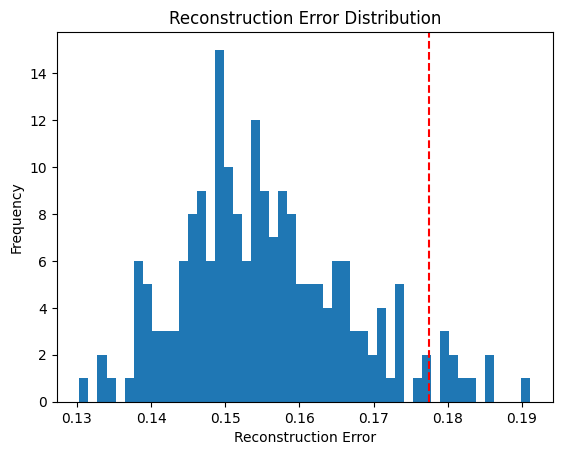

In [ ]:
plt.hist(reconstruction_error, bins=50)
plt.axvline(x=threshold, color='r', linestyle='--')
plt.title("Reconstruction Error Distribution")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.show()